In [4]:
from groundingdino.util.inference import load_model, predict, annotate, load_image
import groundingdino.datasets.transforms as T
import cv2
model = load_model("~/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "/home/fyp/weights/groundingdino_swint_ogc.pth")
IMAGE_PATH = "/home/fyp/Pictures/TestSeg/tape_tape_measure.jpg"
TEXT_PROMPT = "clipper . cup . toilet paper . clamp . coil . bottle . tape . tape_measure . tape measure"
BOX_TRESHOLD = 0.45
TEXT_TRESHOLD = 0.35
print("load done")

final text_encoder_type: bert-base-uncased


load done


tensor([[0.6358, 0.4042, 0.1404, 0.1678],
        [0.4096, 0.5885, 0.2655, 0.3586],
        [0.6359, 0.4040, 0.1409, 0.1687]])
['tape', 'coil', 'tape measure']
tensor([0.4577, 0.5716, 0.4709])
<class 'numpy.ndarray'>


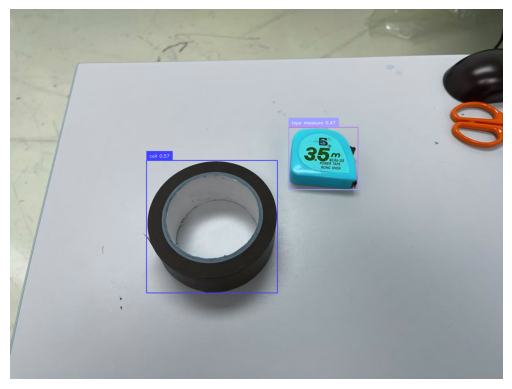

In [13]:
from PIL import Image
import numpy as np
image_o = Image.open(IMAGE_PATH)
# convert image_o to np.array
image_o = cv2.cvtColor(np.array(image_o), cv2.COLOR_RGB2BGR)
cv2.imwrite("annotated_image1.jpg", image_o)
image_o = Image.open(IMAGE_PATH).convert("RGB")
image_o = cv2.cvtColor(np.array(image_o), cv2.COLOR_RGB2BGR)
cv2.imwrite("annotated_image2.jpg", image_o)
image_source, image = load_image(IMAGE_PATH)
# cv2.imwrite("annotated_image3.jpg", image_source)

import matplotlib.pyplot as plt
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)
print(boxes)
print(phrases)
print(logits)
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
print(type(annotated_frame))
cv2.imwrite("annotated_image.jpg", annotated_frame)
# Display anotated_frame in ipynb here using matplotlib
# Use matplotlib
plt.imshow(annotated_frame)
plt.axis('off')
plt.show()